# Bagging and RandomForest

## Digits dataset

In [77]:
from sklearn import datasets, cross_validation, tree, ensemble, grid_search
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [52]:
digits_dataset = load_digits()

X_train = digits_dataset.data
y_train = digits_dataset.target

print(X_train.shape)
print(y_train.shape)

(1797, 64)
(1797,)


#### 1. Using DecisionTreeClassifier here:

In [38]:
def write_answer_1(answer):
    with open('answer_1.txt', 'w') as file:
        file.write(str(answer))

In [39]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)

scores_1 = cross_val_score(tree_clf, X_train, y_train, cv=10)
print(scores_1)
print(scores_1.mean())

write_answer_1(scores_1.mean())

[ 0.8         0.84153005  0.83977901  0.79444444  0.78212291  0.87709497
  0.88268156  0.80898876  0.82485876  0.81818182]
0.826968228524


#### 2. Using BaggingClassifier:

In [46]:
def write_answer_2(answer):
    with open('answer_2.txt', 'w') as file:
        file.write(str(answer))

In [47]:
bag_clf = ensemble.BaggingClassifier(n_estimators=100)
bag_clf.fit(X_train, y_train)

scores_2 = cross_val_score(bag_clf, X_train, y_train, cv=10)
print(scores_2)
print(scores_2.mean())

write_answer_2(scores_2.mean())

[ 0.88648649  0.96174863  0.90055249  0.93333333  0.92178771  0.97765363
  0.96648045  0.91573034  0.88135593  0.9375    ]
0.928262899688


#### 3. Using $\sqrt{d}$ features for fitting:

In [59]:
def write_answer_3(answer):
    with open('answer_3.txt', 'w') as file:
        file.write(str(answer))

In [61]:
opt_bag_clf = ensemble.BaggingClassifier(n_estimators=100, max_features=int(np.sqrt(X_train.shape[1])))
opt_bag_clf.fit(X_train, y_train)

scores_3 = cross_val_score(opt_bag_clf, X_train, y_train, cv=10)
print(scores_3)
print(scores_3.mean())

write_answer_3(scores_3.mean())

[ 0.90810811  0.96174863  0.9281768   0.92777778  0.9273743   0.94413408
  0.94972067  0.97191011  0.92090395  0.90340909]
0.93432635237


#### 4. Using $\sqrt{d}$ features for splitting every vertex:

In [62]:
def write_answer_4(answer):
    with open('answer_4.txt', 'w') as file:
        file.write(str(answer))

In [64]:
rand_bag_clf = ensemble.BaggingClassifier(base_estimator=DecisionTreeClassifier(max_features=int(np.sqrt(X_train.shape[1]))), 
                                          n_estimators=100)
rand_bag_clf.fit(X_train, y_train)

scores_4 = cross_val_score(rand_bag_clf, X_train, y_train, cv=10)
print(scores_4)
print(scores_4.mean())

write_answer_4(scores_4.mean())

[ 0.92432432  0.9726776   0.95027624  0.95        0.94972067  0.98324022
  0.97765363  0.96067416  0.94350282  0.9375    ]
0.954956967035


#### 5. RandomForestClassifier() from sklearn.ensemble:

In [67]:
rf_clf = ensemble.RandomForestClassifier()
rf_clf.fit(X_train, y_train)

scores_5 = cross_val_score(rf_clf, X_train, y_train, cv=10)
print(scores_5)
print(scores_5.mean())

[ 0.88108108  0.9726776   0.91160221  0.88888889  0.91061453  0.94413408
  0.93854749  0.94382022  0.89265537  0.90909091]
0.919311236597


#### Tuning different hyperparameters

In [85]:
parameters_grid =  {
    'n_estimators' : [5, 10, 15, 30, 50, 100, 150, 200, 300, 500],
    'max_features' : [1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 60],
    'max_depth' : [2, 4, 6, 8, 10, 20, 30, 50, 100],
}

1. n_esimators:

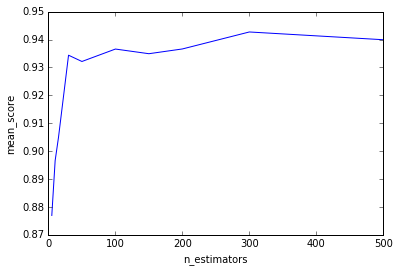

In [81]:
mean_score = []
for n_trees in parameters_grid['n_estimators']:
    scores = cross_val_score(ensemble.RandomForestClassifier(n_estimators=n_trees), X_train, y_train, cv=5)
    mean_score.append(scores.mean())
    
plt.plot(parameters_grid['n_estimators'], mean_score)
plt.xlabel('n_estimators')
plt.ylabel('mean_score')
plt.show()

2. max_features:

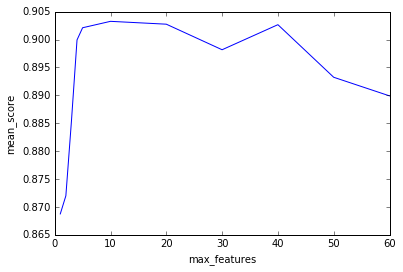

In [87]:
mean_score = []
for max_fts in parameters_grid['max_features']:
    scores = cross_val_score(ensemble.RandomForestClassifier(max_features=max_fts), X_train, y_train, cv=5)
    mean_score.append(scores.mean())
    
plt.plot(parameters_grid['max_features'], mean_score)
plt.xlabel('max_features')
plt.ylabel('mean_score')
plt.show()

3. max_depth:

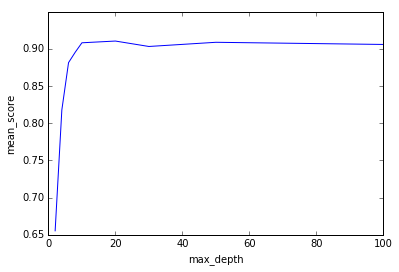

In [88]:
mean_score = []
for depth in parameters_grid['max_depth']:
    scores = cross_val_score(ensemble.RandomForestClassifier(max_depth=depth), X_train, y_train, cv=5)
    mean_score.append(scores.mean())
    
plt.plot(parameters_grid['max_depth'], mean_score)
plt.xlabel('max_depth')
plt.ylabel('mean_score')
plt.show()